# Data Exploration – Interview Chances Predictor

## Objective
To load and explore the placement dataset and understand how candidate attributes relate to interview success.

## Dataset
Placement dataset used as a proxy for interview outcomes due to lack of public interview-level data.

## Target Variable
PlacementStatus (1 = Placed, 0 = Not Placed)


In [5]:
import pandas as pd #data handling
import numpy as np #numericla operations

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

In [6]:
df= pd.read_csv(r"C:\Users\Parth Trivedi\Desktop\CODING\MachineLearning\interview-chances-predictor\data\raw\placementdata.csv")

# we used r before the  path so that python treat it as a raw string else the backward slashes used in the path might be treated as escaape sequence

In [7]:
df.columns = ( #for one of the error rectification basically removed all space from the attribute name
    df.columns
    .str.strip()
    .str.replace('\u00a0', '', regex=False)
)


In [8]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


so from the above table analysis we can see that 
-> studentID is of no use
-> target value is present (placed->1 unplaced->0) (supervised learning)
->  I also feel like there is no need for extra curricural activity handling (How will I justify 
    it??)
-> Low relevance of HSC, SSC marks
-> Later something can be done to make it company specific
-> soft skill rating source unclear


(In last i'll try to add a feature which will take the audio file and would give the softskill rating which is already present in our dataste)

In [9]:
df.shape

(10000, 12)

Good amount of data!!

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


So here we go for a bit more analysis using df.info()
-> so there are no null values so no need for null value handling 
-> to categorical colummns one is ExtracurricularActivities  other is PlacementStatus(target 
   value)
->Rest are numerical data 

In [11]:
df["PlacementStatus"].value_counts()
df["PlacementStatus"].value_counts(normalize=True)


PlacementStatus
NotPlaced    0.5803
Placed       0.4197
Name: proportion, dtype: float64

DATA is balanced

No null value handling required

In [12]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [13]:
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

1.5 now we are entering the univariate analysis (feature by feature analysis) (understanding each feature and how much do it affect the target value that is placement)

In [16]:
target = "PlacementStatus"   # target variable
features = [col for col in df.columns if col != target and col != "StudentID"]

features


['CGPA',
 'Internships',
 'Projects',
 'Workshops/Certifications',
 'AptitudeTestScore',
 'SoftSkillsRating',
 'ExtracurricularActivities',
 'PlacementTraining',
 'SSC_Marks',
 'HSC_Marks']

We define:

target → what we want to predict

features → all input variables

array([[<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Internships'}>,
        <Axes: title={'center': 'Projects'}>],
       [<Axes: title={'center': 'Workshops/Certifications'}>,
        <Axes: title={'center': 'AptitudeTestScore'}>,
        <Axes: title={'center': 'SoftSkillsRating'}>],
       [<Axes: title={'center': 'SSC_Marks'}>,
        <Axes: title={'center': 'HSC_Marks'}>, <Axes: >]], dtype=object)

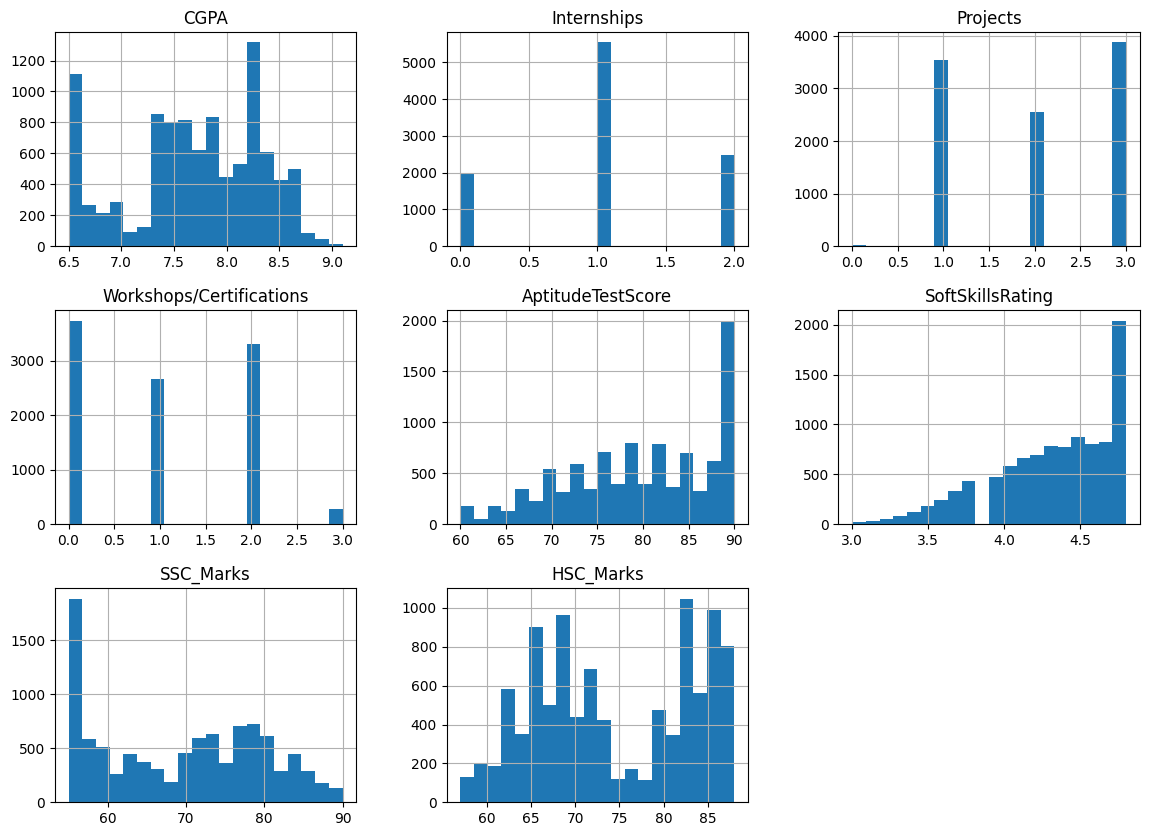

In [ ]:
df[features].hist(figsize=(14,10),bins=20)


Why we do this
Understand data shape

Identify:
skewed features (may need scaling/log)
binary features
unrealistic values

In [ ]:
df.groupby("PlacementStatus")["CGPA"].mean()


PlacementStatus
NotPlaced    0.901775
Placed       1.253038
Name: Internships, dtype: float64

What it does
Groups students by placement outcome
Computes average CGPA for each group

Conclusion
✔ Higher CGPA → higher interview/placement success
✔ CGPA is a strong individual predictor

In [ ]:
df.groupby(target)["Internships"].mean()
#✔ Internship experience strongly improves interview chances

PlacementStatus
NotPlaced    0.901775
Placed       1.253038
Name: Internships, dtype: float64

In [ ]:
df.groupby(target)["Projects"].mean()
#✔ Practical project work correlates with interview success

PlacementStatus
NotPlaced    1.675857
Placed       2.511556
Name: Projects, dtype: float64

In [ ]:
df.groupby(target)["AptitudeTestScore"].mean()

PlacementStatus
NotPlaced    75.829399
Placed       84.455802
Name: AptitudeTestScore, dtype: float64

In [ ]:
df.groupby(target)["SoftSkillsRating"].mean()
# One of the strongest predictors


PlacementStatus
NotPlaced    4.174393
Placed       4.530760
Name: SoftSkillsRating, dtype: float64

In [ ]:
df.groupby(target)["Workshops/Certifications"].mean()
# ✔ Medium impact

PlacementStatus
NotPlaced    0.73462
Placed       1.39838
Name: Workshops/Certifications, dtype: float64

In [ ]:
df.groupby(target)["SSC_Marks"].mean()


PlacementStatus
NotPlaced    64.992590
Placed       74.920658
Name: SSC_Marks, dtype: float64

In [ ]:
df.groupby(target)["HSC_Marks"].mean()


PlacementStatus
NotPlaced    70.665346
Placed       79.805575
Name: HSC_Marks, dtype: float64

<Figure size 600x400 with 0 Axes>

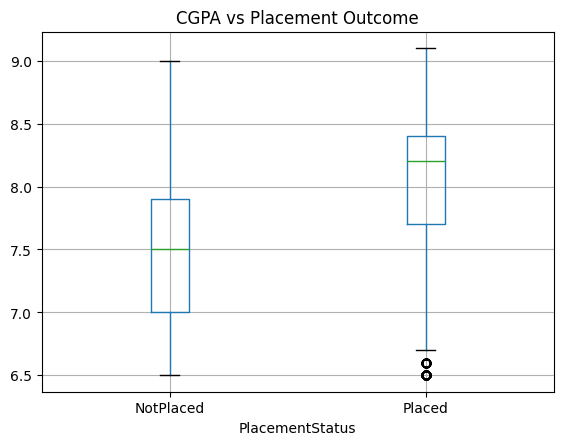

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df.boxplot(column="CGPA", by=target)
plt.title("CGPA vs Placement Outcome")
plt.suptitle("")
plt.show()


## Univariate Feature Insights

| Feature | Strength |
|------|--------|
| CGPA | Strong |
| Internships | Strong |
| Projects | Strong |
| AptitudeTestScore | Strong |
| SoftSkillsRating | Very Strong |
| PlacementTraining | Strong |
| Workshops/Certifications | Medium |
| ExtracurricularActivities | Weak |
| SSC_Marks | Weak |
| HSC_Marks | Weak |


## Conclusions from Univariate Analysis

- Academic performance, practical experience, aptitude, soft skills, and placement training show strong individual correlation with placement outcomes.
- SoftSkillsRating emerges as one of the strongest predictors of interview success.
- SSC and HSC marks show limited predictive power compared to recent performance indicators.
- Weak features are flagged but not dropped yet.


Univariate analysis told us:
which features matter individually

Multivariate analysis answers:
Which features are redundant
Which features work together
Which features actually matter once others are present

In [20]:
num_df = df[features + [target]] #complete data
num_df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
#conversion of strings into data type otherwise our model wont understand yes no placed notplaced
temp_df = num_df.copy()

binary_map = {
    "Yes": 1,
    "No": 0,
    "Placed": 1,
    "NotPlaced": 0
}

temp_df = temp_df.replace(binary_map)


C:\Users\Parth Trivedi\AppData\Local\Temp\ipykernel_7748\681730492.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df = temp_df.replace(binary_map)


### Handling Categorical Features for Correlation

Binary categorical variables were temporarily encoded (Yes/No → 1/0) to enable correlation analysis.
This encoding is used only for exploratory analysis and not final preprocessing.


In [ ]:
#Compute Correlation Matrix (for the identification of the relationship with the target)
corr_matrix = temp_df.corr()
corr_matrix


,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
CGPA,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.444130,0.251628,0.404971,0.462313,0.423131
Internships,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.274960,0.153547,0.279837,0.317149,0.260340
Projects,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.491430,0.293709,0.499421,0.535708,0.475186
Workshops/Certifications,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373926,0.180333,0.373045,0.418442,0.362268
AptitudeTestScore,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.474130,0.314772,0.513044,0.565105,0.521744
SoftSkillsRating,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.448049,0.235571,0.430734,0.466912,0.427284
ExtracurricularActivities,0.444130,0.274960,0.491430,0.373926,0.474130,0.448049,1.000000,0.327158,0.517850,0.533572,0.482491
PlacementTraining,0.251628,0.153547,0.293709,0.180333,0.314772,0.235571,0.327158,1.000000,0.257440,0.325434,0.323659
SSC_Marks,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,0.517850,0.257440,1.000000,0.524916,0.469763
HSC_Marks,0.462313,0.317149,0.535708,0.418442,0.565105,0.466912,0.533572,0.325434,0.524916,1.000000,0.505746


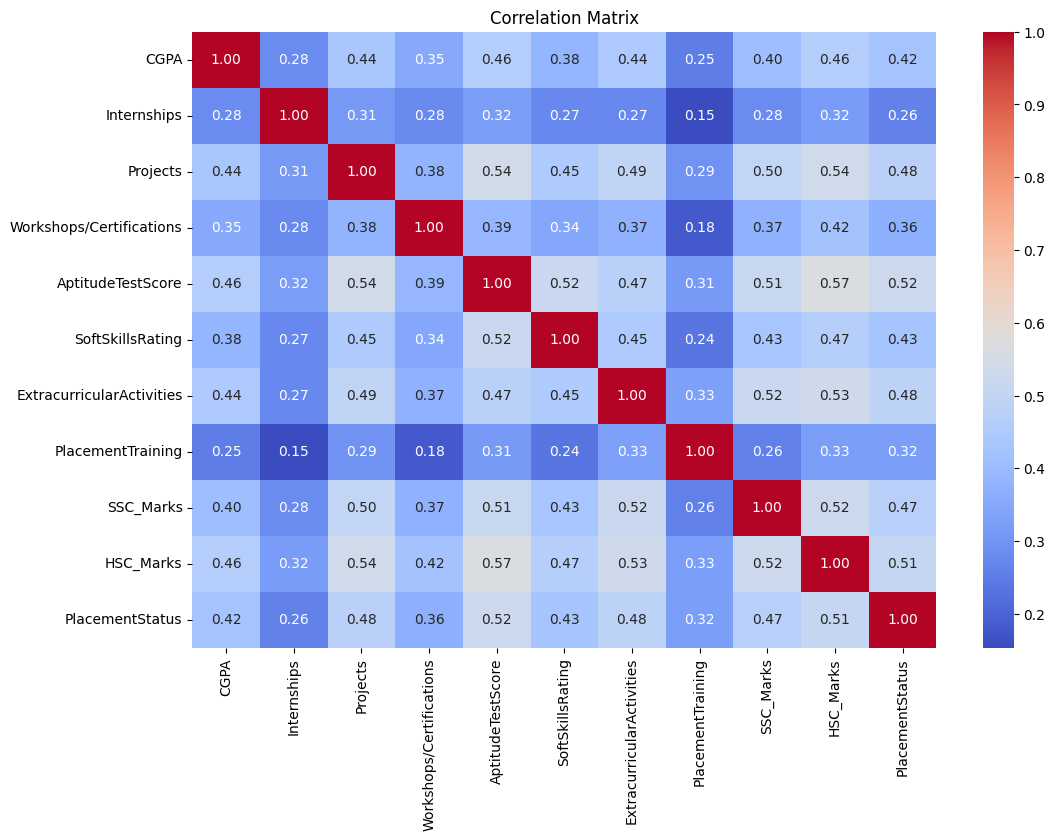

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [32]:
#correlationn with target\
corr_with_target = corr_matrix[target].sort_values(ascending=False)
corr_with_target


PlacementStatus              1.000000
AptitudeTestScore            0.521744
HSC_Marks                    0.505746
ExtracurricularActivities    0.482491
Projects                     0.475186
SSC_Marks                    0.469763
SoftSkillsRating             0.427284
CGPA                         0.423131
Workshops/Certifications     0.362268
PlacementTraining            0.323659
Internships                  0.260340
Name: PlacementStatus, dtype: float64

So  from the above correlation matrix analysis you can get a lot of diiferent surprising conclusions that what factors are affecting the placement which is our target value
